In [71]:
from distmesh import *
import numpy as np
import matplotlib.pyplot as plt
import math

count =  200 displacement =  0.006402785939286962
count =  400 displacement =  0.0034940038215045452
count =  600 displacement =  0.0031376679040061076
count =  800 displacement =  0.0016360047087341804


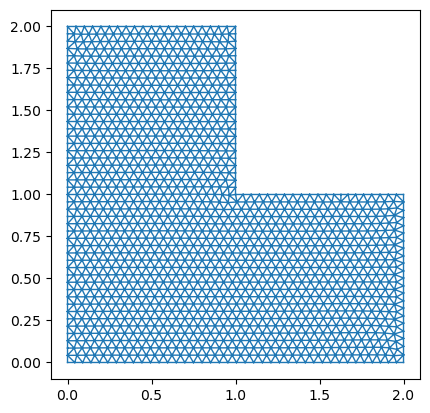

In [72]:
# L shape
# take the rectangle with vertices [0,0] and [2,2],
# remove the rectangle with vertices [1,1] and [2,2]

def fd(p):
    d1 = drectangle(p,0,2,0,2)
    d2 = drectangle(p,1,2,1,2)
    return ddiff(d1,d2)

pfix = [[0,0], [2,0], [2,1], [1,1], [1,2], [0,2]]
distmesh2D(fd, huniform, 0.05, [0, 2, 0, 2], pfix)
plt.savefig("hw7 q2 shape 1.png")

count =  200 displacement =  0.0068118211482147695
count =  400 displacement =  0.005305767332639039


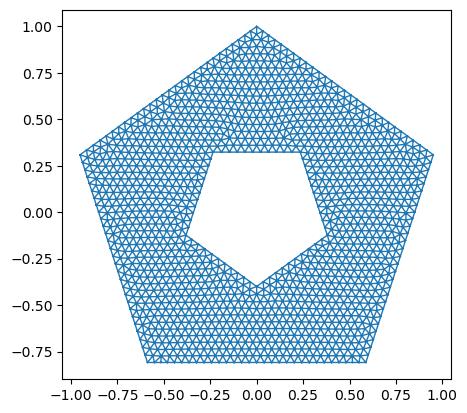

In [67]:
# pentagon with smaller pentagon removed

# define distance to a line given by points [x1,y1] and [x2,y2]
def dline(p, x1, y1, x2, y2):
    a = x2 - x1
    b = y2 - y1
    return (a*(y1 - p[:,1]) - b*(x1 - p[:,0]))/np.sqrt(a**2 + b**2)

n = 5
t = 2*np.pi/n
dphi = np.pi/2 - t
angles = t*np.array(range(n+1))
pfix = [[np.cos(angles[j]+dphi), np.sin(angles[j]+dphi)] for j in range(n)]
r = 2/5
pfix += [[r*np.cos(angles[j]+dphi+t/2), r*np.sin(angles[j]+dphi+t/2)] for j in range(n)]

def fd(p):
    d = -math.inf
    # create outer pentagon by intersecting half planes given by edges
    for j in range(n):
        d0 = dline(p,
                   np.cos(angles[j]+dphi), 
                   np.sin(angles[j]+dphi), 
                   np.cos(angles[j+1]+dphi), 
                   np.sin(angles[j+1]+dphi))
        d = dintersect(d,d0)
    d_inner = -math.inf
    # create inner pentagon and subtract from outer pentagon
    for j in range(n):
        d0 = dline(p, 
                   r*np.cos(angles[j]+dphi+t/2), 
                   r*np.sin(angles[j]+dphi+t/2), 
                   r*np.cos(angles[j+1]+dphi+t/2), 
                   r*np.sin(angles[j+1]+dphi+t/2))
        d_inner = dintersect(d_inner,d0)        
    return ddiff(d,d_inner)

distmesh2D(fd, huniform, 0.04, [-1,1,-1,1], pfix)
plt.savefig("hw7 q2 shape 2.png")

count =  200 displacement =  0.009290356792590613
count =  400 displacement =  0.0023348721848723396
count =  600 displacement =  0.0032577532865817414
count =  800 displacement =  0.002757763725918135
count =  1000 displacement =  0.0016356075055433468
count =  1200 displacement =  0.0020888363543245378


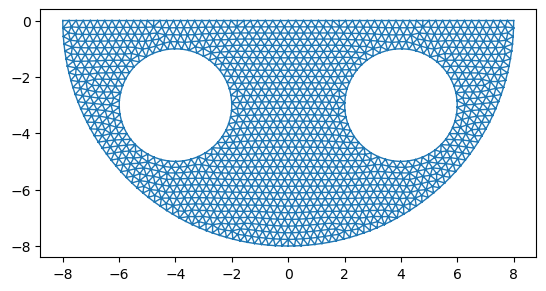

In [68]:
# semicircle with two smaller circles removed
# take the circle with center [0,0] and radius 8
# remove the rectangle with vertices [-8,0] and [8,8]
# remove the circle with center [-4,-3] and radius 2
# remove the circle with center [4,-3] and radius 2

def fd(p):
    d1 = dcircle(p,0,0,8)
    d2 = drectangle(p,-8,8,0,8)
    d3 = dcircle(p,-4,-3,2)
    d4 = dcircle(p,4,-3,2)
    return ddiff(ddiff(ddiff(d1,d2),d3),d4)

pfix = [[-8,0], [8,0]]
distmesh2D(fd, huniform, 0.25, [-8, 8, -8, 8], pfix)
plt.savefig("hw7 q2 shape 3.png")